Adapted from the geopanda introductory tutorial

Install geodatasets and import required libraries

Then we'll load a dataset from geodatasets and establish that as a geodataframe (gdf)

In [ ]:
'''
pip install geodatasets
pip install rasterio
pip install geopandas
pip install matplotlib
pip install certifi
pip install urllib3
pip install certifi
pip install zipfile
'''
import geopandas
import geodatasets
from geodatasets import get_path
from urllib.request import urlretrieve
import rasterio
import os
import matplotlib.pyplot as plt
#import zipfile
import ssl
import certifi
ssl._create_default_https_context = ssl._create_unverified_context


Establish an object that is the URL for the data we want to access. If you're working locally you may want to provide a specific path (e.g.,"C:/Users/awm878/Downloads")




In [ ]:
url = ("https://curio.lib.utexas.edu/geodata/raster/utlmaps__ams__asia__1000k__6622985__rangoon_ne_47.zip")
filename = "ams_map.zip"

Use the urlretrieve function to retrieve the file

In [ ]:
urlretrieve(url, filename)

('ams_map.zip', <http.client.HTTPMessage at 0x794f96c35330>)

It is a zipped file so we will unzip using !unzip

In [ ]:
# Path to the zip file
zip_file_path = 'ams_map.zip'

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the current directory
    zip_ref.extractall('map-example')

Now we can use the plot.show function from rasterio

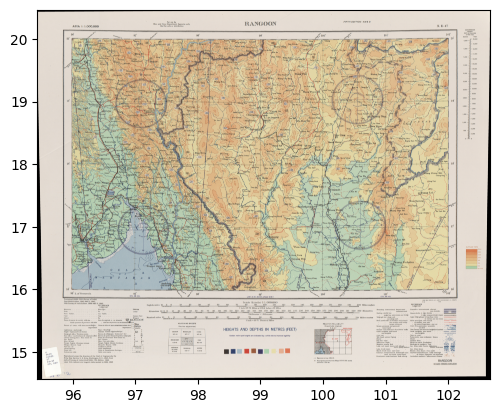

<Axes: >

In [ ]:

from rasterio.plot import show
show(rasterio.open("map-example/utlmaps__ams__asia__1000k__6622985__rangoon_ne_47.jpg"))




Now let's download a batch of files using a for loop

In [ ]:

import urllib

def get_filename(url):
    """
    Parses filename from given url
    """
    if url.find('/'):
        return url.rsplit('/', 1)[1]

# Filepaths
outdir = r"Example GeoData"

# File locations
url_list = ["https://curio.lib.utexas.edu/geodata/raster/utlmaps__sfi__austin_tx_1885__1k__x__6.zip",
            "https://curio.lib.utexas.edu/geodata/raster/utlmaps__sfi__austin_tx_1885__1k__x__7.zip",
            "https://curio.lib.utexas.edu/geodata/raster/utlmaps__sfi__austin_tx_1885__1k__x__8.zip"]

# Create folder if it does no exist
if not os.path.exists(outdir):
    os.makedirs(outdir)

# Download files
for url in url_list:
    # Parse filename
    fname = get_filename(url)
    outfp = os.path.join(outdir, fname)
    # Download the file if it does not exist already
    if not os.path.exists(outfp):
        print("Downloading", fname)
        r = urllib.request.urlretrieve(url, outfp)

for url in url_list:
    # Parse filename
    fname = get_filename(url)
    outfp = os.path.join(outdir, fname)

    # Unzip the file
    with zipfile.ZipFile(outfp, 'r') as zip_ref:
        zip_ref.extractall(outdir)

Now we'll access a geojson file from the city of Austin GIS database: https://data.austintexas.gov/Locations-and-Maps/Watershed-Boundaries/2829-xbvw/about_data


('austin_was_map.geojson', <http.client.HTTPMessage at 0x794f969bf550>)

Load a spatial dataset and assign it as a geodataframe

In [ ]:
filename = "austin_was_map.geojson"
file = open(filename)
df = geopandas.read_file(file)
df

,created_by,shape_area,receiving_basin,created_date,display_name,watershed_id,objectid,watershed_full_name,watershed_code,shape_length,modified_by,rsmp_participation,receiving_waters,modified_date,geometry
0,EWADSWORTH,49473021.375,Lake Austin,2013-04-11 15:26:49+00:00,Steiner,127,62,Steiner Creek,STN,36953.6219570408,SSUDDUTH,3,Lake Austin,2023-06-14 13:24:46+00:00,"MULTIPOLYGON (((-97.88562 30.37156, -97.88562 ..."
1,EWADSWORTH,51785501.0859375,Colorado River below Longhorn Dam,2013-04-11 15:26:49+00:00,E Bouldin,4,34,East Bouldin Creek,EBO,51760.4486172386,SSUDDUTH,0,Lady Bird Lake,2023-06-14 13:25:12+00:00,"MULTIPOLYGON (((-97.75214 30.25907, -97.75213 ..."
2,EWADSWORTH,74147311.393047333,Colorado River below Longhorn Dam,2013-04-11 15:26:49+00:00,W Bouldin,109,76,West Bouldin Creek,WBO,60487.356047171183,SSUDDUTH,0,Lady Bird Lake,2023-06-14 13:26:33+00:00,"MULTIPOLYGON (((-97.75583 30.26421, -97.75561 ..."
3,EWADSWORTH,1545644171.0566406,Colorado River below Longhorn Dam,2013-04-11 15:26:49+00:00,Cedar,24,10,Cedar Creek,CDR,238177.17577715046,SSUDDUTH,2,Colorado River below Longhorn Dam,2023-06-14 13:27:08+00:00,"MULTIPOLYGON (((-97.56740 30.11599, -97.56736 ..."
4,EWADSWORTH,79496777.8359375,Lake Austin,2013-04-11 15:26:49+00:00,Honey,54,15,Honey Creek,HNY,38302.778200638844,SSUDDUTH,3,Lake Austin,2023-06-14 13:27:19+00:00,"MULTIPOLYGON (((-97.94322 30.34735, -97.94322 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,EWADSWORTH,14884528.505859375,Colorado River below Longhorn Dam,2013-04-11 15:26:49+00:00,Harper's Branch,58,70,Harper's Branch,HRP,18714.6822029484,SSUDDUTH,0,Lady Bird Lake,2023-06-14 13:26:16+00:00,"MULTIPOLYGON (((-97.73339 30.24831, -97.73334 ..."
72,EWADSWORTH,2027595289.5491333,Gulf of Mexico,2013-04-11 15:26:49+00:00,Colorado River,32,4,Colorado River,COL,482066.69149471982,SSUDDUTH,1,Gulf of Mexico,2023-06-14 13:26:49+00:00,"MULTIPOLYGON (((-97.52651 30.29769, -97.52637 ..."
73,EWADSWORTH,35667230.810546875,Lake Austin,2013-04-11 15:26:49+00:00,St. Stephens,99,12,St. Stephens Creek,STP,39414.717180403983,SSUDDUTH,1,Lake Austin,2023-06-14 13:27:12+00:00,"MULTIPOLYGON (((-97.79670 30.34864, -97.79669 ..."
74,EWADSWORTH,59744435.521484375,Lake Austin,2013-04-11 15:26:49+00:00,Bear W,20,3,Bear Creek West,BRW,43264.925521503574,SSUDDUTH,3,Lake Austin,2023-06-14 13:26:37+00:00,"MULTIPOLYGON (((-97.86653 30.39449, -97.86647 ..."


Now we'll project the dataset

In [ ]:
gdf = df.to_crs("ESRI:102003")


Plot the data

<Axes: >

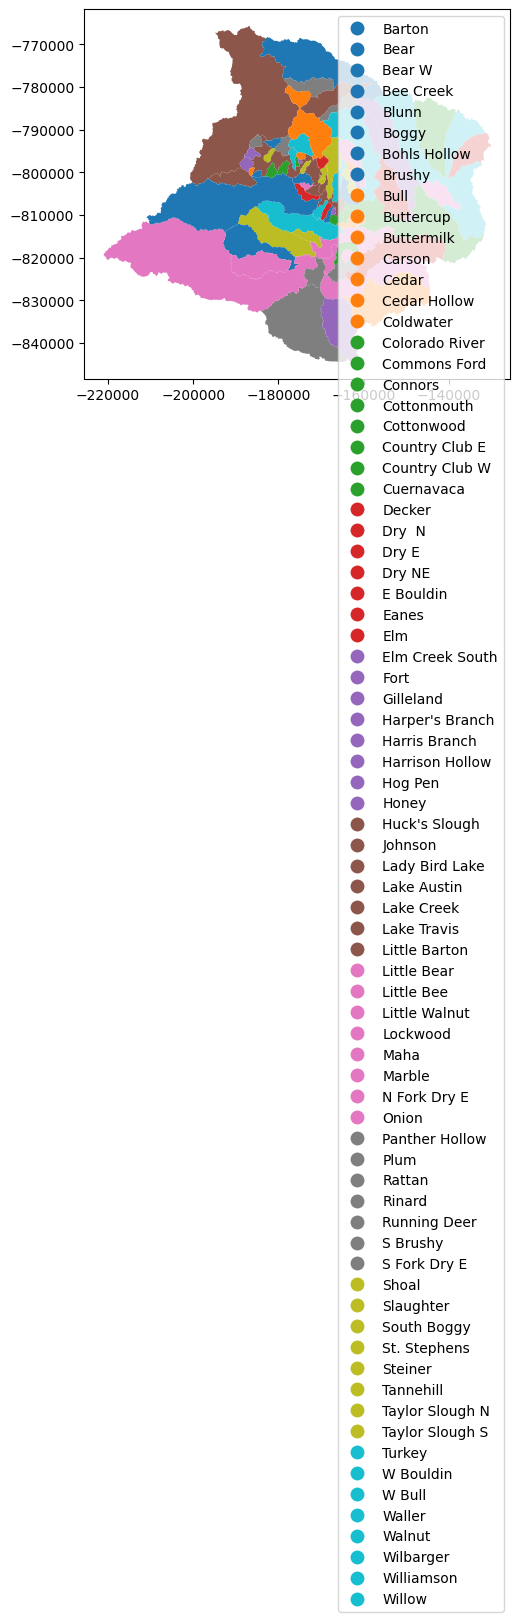

In [ ]:
gdf.plot("display_name", legend=True)


Calculate the area of receiving baisins

In [ ]:
# Dissolve the geodataframe by receiving basin
dissolved = gdf.dissolve(by='receiving_basin')

# Calculate the area of each dissolved polygon
dissolved['area'] = dissolved.area

# Reset the index to make 'receiving_basin' a column again
dissolved = dissolved.reset_index()

# Print the resulting geodataframe
print(dissolved[['receiving_basin', 'area']])

                     receiving_basin          area
0                       Blanco River  2.774044e+08
1                       Brushy Creek  1.213183e+08
2  Colorado River below Longhorn Dam  2.706499e+09
3                     Gulf of Mexico  1.883800e+08
4                     Lady Bird Lake  2.968212e+07
5                        Lake Austin  2.352287e+08
6                        Lake Travis  4.147954e+08


We can simply plot our map now

<Axes: >

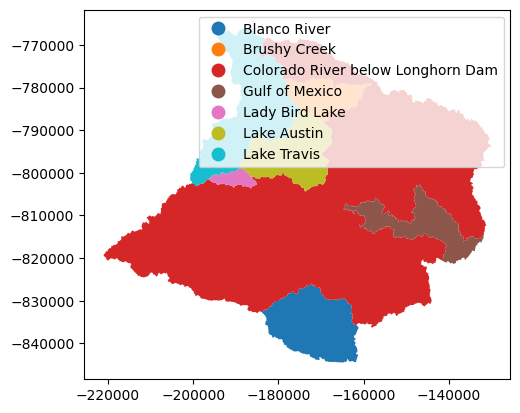

In [ ]:
dissolved.plot('receiving_basin', legend=True)

For a proper legend we have to do a bit more work



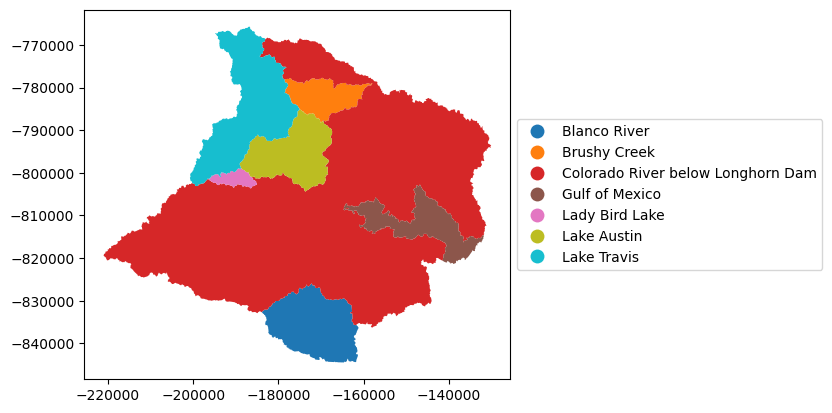

In [ ]:
ax = dissolved.plot(
    column="receiving_basin",
    categorical=True,
    legend=True,
    legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5), "fmt": "{:.0f}"},
)


Now let's set receiving basin as our index to do a calculation

In [ ]:
indexed = dissolved.set_index("receiving_basin")

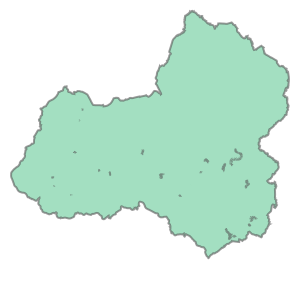

In [ ]:
lake_austin = indexed.loc["Lake Austin", "geometry"]
lake_austin

In [ ]:
# buffering the active geometry by 1000 meters (geometry is already in meters)
indexed["buffered"] = indexed.buffer(1000)


<Axes: >

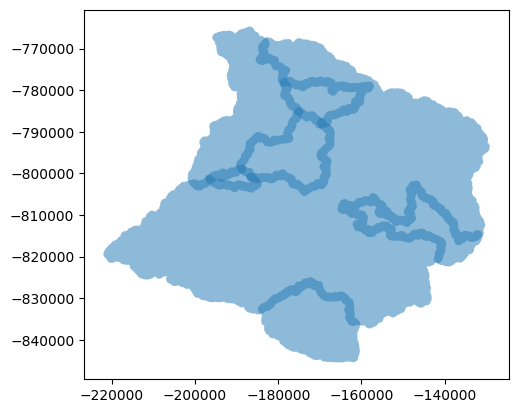

In [ ]:
indexed["buffered"].plot(alpha=0.5)


Now we can calculate which watersheds are within 1000 meters of Lake Austin

In [ ]:
indexed["buffered"].intersects(lake_austin)


,0
receiving_basin,
Blanco River,False
Brushy Creek,True
Colorado River below Longhorn Dam,True
Gulf of Mexico,False
Lady Bird Lake,True
Lake Austin,True
Lake Travis,True
